# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

<AxesSubplot:>

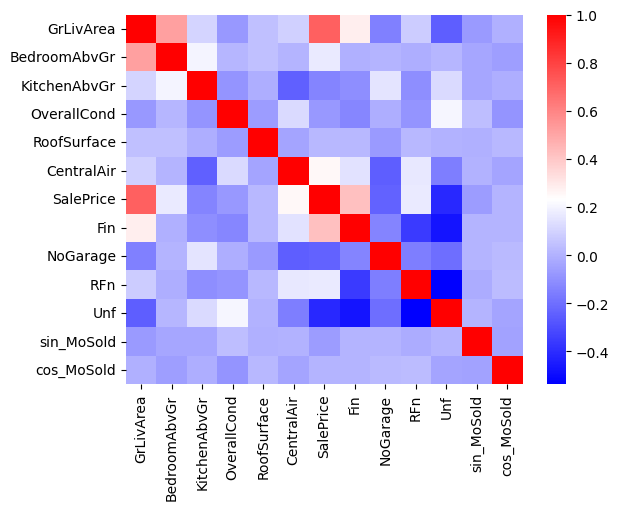

In [3]:
# YOUR CODE HERE
import seaborn as sns

corr = data.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='bwr')

❓ Visualize the correlation between column pairs in a dataframe ❓

In [4]:
# YOUR CODE HERE
corr_df = corr.stack().reset_index()

corr_df.columns = ['feature1', 'feature2', 'correlation']

corr_df.sort_values(by='correlation', ascending=False, inplace=True)

corr_df = corr_df[corr_df['feature1']!= corr_df['feature2']]

corr_df.head()

,feature1,feature2,correlation
6,GrLivArea,SalePrice,0.707685
78,SalePrice,GrLivArea,0.707685
1,GrLivArea,BedroomAbvGr,0.519712
13,BedroomAbvGr,GrLivArea,0.519712
85,SalePrice,Fin,0.419678


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [6]:
# YOUR CODE HERE
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])
correlated_features

0

🧪 **Test your code**

In [7]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-feature-selection/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [6]:
# YOUR CODE HERE
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [7]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

model = LinearRegression()

cv = cross_validate(model, X, y, cv=5)

base_model_score = cv['test_score'].mean()
base_model_score

0.6419144066998052

🧪 **Test your code**

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-feature-selection/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [9]:
# YOUR CODE HERE
import numpy as np
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y)

permutation_score = permutation_importance(model, X, y, n_repeats=100)

importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)

importance_df.columns = ['feature', 'feature importance']

importance_df.sort_values(by='feature importance', ascending=False)

,feature,feature importance
0,GrLivArea,1.016667
1,BedroomAbvGr,0.065637
6,Fin,0.052784
9,Unf,0.020618
2,KitchenAbvGr,0.019249
5,CentralAir,0.01514
7,NoGarage,0.011925
8,RFn,0.011436
10,sin_MoSold,0.000906
3,OverallCond,0.000243


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [10]:
# YOUR CODE HERE
best_feature = importance_df.feature[0]
best_feature

'GrLivArea'

🧪 **Test your code**

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-feature-selection/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [12]:
# YOUR CODE HERE
X = X.drop(columns=['RoofSurface','OverallCond','sin_MoSold','cos_MoSold','RFn','NoGarage']) # Drops weak features

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

simplified_model_score = scores.mean()

simplified_model_score

0.6376353182930796

🧪 **Test your code**

In [13]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-7.1.3, pluggy-1.0.0 -- /Users/bita/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bita/code/lewagon/data-feature-selection/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!